In [7]:
from scipy import io
%pylab inline
%load_ext autoreload
%autoreload 2
import os
os.chdir("../")

#Helper Functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

Populating the interactive namespace from numpy and matplotlib


## Loading the test set data (object-based models)

In [3]:
models = np.load("./dataset/test_half_circle_facies_vp_rho.npy")

## Checking distributions of test set images

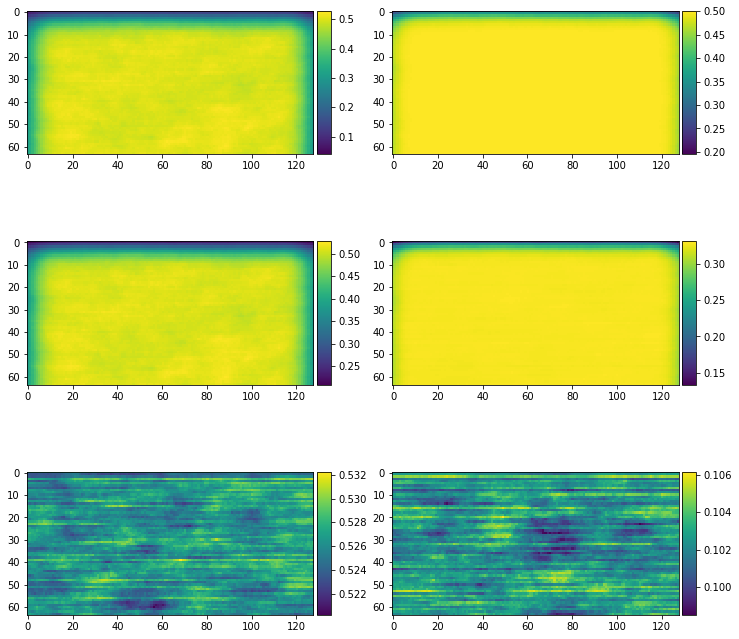

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    ax1 = ax[i, 0].imshow(models[:, i].mean(axis=0))
    colorbar(ax1)
    ax2 = ax[i, 1].imshow(models[:, i].std(axis=0))
    colorbar(ax2)

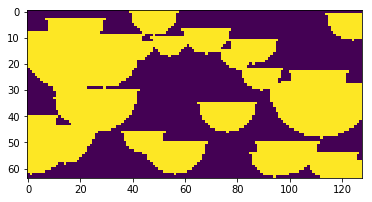

In [11]:
dat = np.swapaxes(models[67].astype(np.float32), 1, 2)
plt.imshow(dat[0, :, :].T)
#np.save("../solvers/mrst_two_phase_flow/model_67_x.npy", dat)

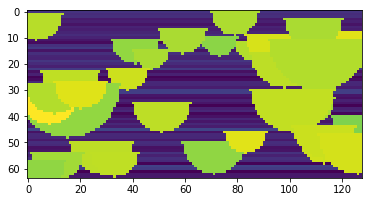

In [6]:
plt.imshow(dat[1, ::-1, :].T)

## Define a high permeability case (not used in publication)

In [ ]:
a = 0.1
b = 1e-13

c = 0.3
d = 0.1
perm = (dat[0]+a)*b
print(perm.min(), perm.max())
poro = (dat[1]*c)+d
print(poro.min(), poro.max())
perm = np.expand_dims(perm, 2)
poro = np.expand_dims(poro, 2)
print(perm.shape)

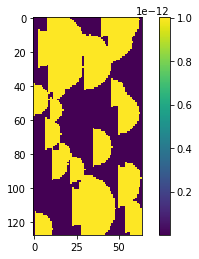

In [16]:
plt.imshow(perm[:, :, 0])
plt.colorbar()

## Create a low permeability case (used in publication)

In [ ]:
a = 0.001
b = 1e-12

c = 0.3
d = 0.1
perm = (dat[0]+a)*b
print(perm.min(), perm.max())
poro = (dat[1]*c)+d
print(poro.min(), poro.max())
perm = np.expand_dims(perm, 2)
poro = np.expand_dims(poro, 2)
print(perm.shape)

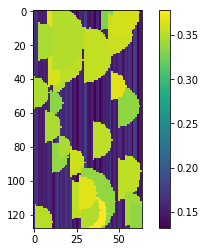

In [15]:
plt.imshow(poro[:, :, 0])
plt.colorbar()

## Save the case to the MRST directory

In [17]:
out = {'perm': perm.astype(np.float64), 'poro': poro.astype(np.float64)}
io.savemat('../solvers/mrst_two_phase_flow/mrst/mrst-2018a/modules/optimization/examples/model2Dtest/utils/vertcase3/test_new_67.mat', {'rock': out})